In [1]:
import numpy as np
from astropy.table import Table, vstack
from astropy.io import fits
import matplotlib.pyplot as plt
from imaka.analysis import psf_models
from imaka.analysis import plot_stats
%matplotlib inline

In [67]:
#Read in Run 5 stats tables
table1 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170517/FLI/reduce/stats/stats_closed.fits')
table2 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170518/FLI/reduce/stats/stats_closedA.fits')
table3 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_closedA.fits')
table4 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170520/FLI/reduce/stats/stats_closedA.fits')
table5 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170521/FLI/reduce/stats/stats_closed.fits')

table=vstack([table1, table2, table3, table4, table5])

# Make empty columns for data
x_wid_c = []
y_wid_c = []
power_c = []
fwhm_c = []

#for table in [all_tables]:

for i in range(len(table)):

        # calcuate wavelength and binning scaling factor
    calib = ((plot_stats.filter2wv(table['FILTER'][i])/500)**0.2) * table['BINFAC'][i] * 0.04
        
        #Pull average source image names from stats tables (edits for different machines)
    if 'astrouser' in table['Image'][i]:
        psf_file_root = '/Users/fatimaabdurrahman/Desktop/Research' + table['Image'][i].split('imaka')[-1] 
        psf_file = psf_file_root.split('.')[0] + '_psf_obs.fits'
    else:
        psf_file = table['Image'][i][:-5]+'_psf_obs.fits'
    psf_cut = fits.getdata(psf_file, header=False)
        
        # Performs moffat fit on average image, using corresponding empirical fwhm as initial guesses
    fit = psf_models.model_fit("Moffat", psf_cut, 1, x_wid=table['emp_fwhm'][i], y_wid=table['emp_fwhm'][i], title="Open Loop")
    if fit.power.value > 0:
        x_wid_c.append((abs(fit.width_x.value)*calib)[0])
        y_wid_c.append((abs(fit.width_y.value)*calib)[0])
        power_c.append((abs(fit.power.value)*calib)[0])
        fwhm_c.append(((table['emp_fwhm'][i]) * calib)[0])
        
        

In [68]:
#Read in Run 5 stats tables
table1 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170517/FLI/reduce/stats/stats_open.fits')
table2 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170518/FLI/reduce/stats/stats_open.fits')
table3 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170519/FLI/reduce/stats/stats_open.fits')
table4 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170520/FLI/reduce/stats/stats_open.fits')
table5 = Table.read('/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170521/FLI/reduce/stats/stats_open.fits')

table = vstack([table1, table2, table3, table4, table5])

# Make empty columns for data
x_wid_o = []#np.zeros(total_files, dtype=float)
y_wid_o = []#np.zeros(total_files, dtype=float)
power_o = []#np.zeros(total_files, dtype=float)
fwhm_o = []#np.zeros(total_files, dtype=float)

#for table in [all_tables]:

for i in range(len(table)):

        # calcuate wavelength and binning scaling factor
    calib = ((plot_stats.filter2wv(table['FILTER'][i])/500)**0.2) * table['BINFAC'][i] * 0.04
        
        #Pull average source image names from stats tables (edits for different machines)
    if 'astrouser' in table['Image'][i]:
        psf_file_root = '/Users/fatimaabdurrahman/Desktop/Research' + table['Image'][i].split('imaka')[-1] 
        psf_file = psf_file_root.split('.')[0] + '_psf_obs.fits'
    else:
        psf_file = table['Image'][i][:-5]+'_psf_obs.fits'
    psf_cut = fits.getdata(psf_file, header=False)
        
        # Performs moffat fit on average image, using corresponding empirical fwhm as initial guesses
    fit = psf_models.model_fit("Moffat", psf_cut, 1, x_wid=table['emp_fwhm'][i], y_wid=table['emp_fwhm'][i], title="Open Loop")
    if fit.power.value > 0:
        x_wid_o.append((abs(fit.width_x.value)*calib)[0])
        y_wid_o.append((abs(fit.width_y.value)*calib)[0])
        power_o.append((abs(fit.power.value)*calib)[0])
        fwhm_o.append(((table['emp_fwhm'][i]) * calib)[0])
        
        

[0, 3, 0, 3]

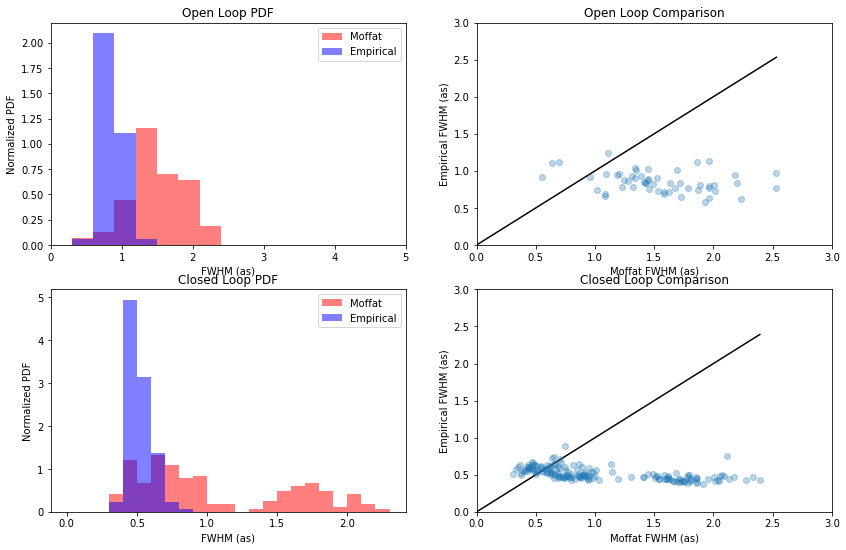

In [46]:
x_fwhm_o = 2 * np.array(x_wid_o)[0,:] * np.sqrt((2**(1/np.array(power_o)))-1)
y_fwhm_o = 2 * np.array(y_wid_o)[0,:] * np.sqrt((2**(1/np.array(power_o)))-1)
x_fwhm_c = 2 * np.array(x_wid_c)[0,:] * np.sqrt((2**(1/np.array(power_c)))-1)
y_fwhm_c = 2 * np.array(y_wid_c)[0,:] * np.sqrt((2**(1/np.array(power_c)))-1)

x_wid_o_raw = np.zeros(len(fwhm_o), dtype=float)
y_wid_o_raw = np.zeros(len(fwhm_o), dtype=float)
power_o_raw = np.zeros(len(fwhm_o), dtype=float)
emp_fwhm_o = np.zeros(len(fwhm_o), dtype=float)

emp_fwhm_o = np.zeros(len(fwhm_o), dtype=float)
emp_fwhm_o = np.zeros(len(fwhm_o), dtype=float)
emp_fwhm_o = np.zeros(len(fwhm_o), dtype=float)

for i in range(len(fwhm_o)):
    emp_fwhm_o[i] = fwhm_o[i]
    emp_fwhm_o[i] = fwhm_o[i]
    
emp_fwhm_c = np.zeros(len(fwhm_c), dtype=float)
for i in range(len(fwhm_c)):
    emp_fwhm_c[i] = fwhm_c[i]

plt.figure(1, figsize = (14,9))

plt.subplot(221)
plt.hist(y_fwhm_o,  bins = np.arange(0, max(y_fwhm_o), .3), color='r', alpha=0.5, label = 'Moffat', normed=True);
plt.hist(emp_fwhm_o,  bins = np.arange(0, max(y_fwhm_o), .3), color='blue', alpha=0.5, label = 'Empirical', normed=True);
plt.xlabel('FWHM (as)'); plt.ylabel('Normalized PDF'); plt.legend()
plt.axis([0, 5, 0, 2.2]); plt.title('Open Loop PDF')

plt.subplot(222)
plt.plot([0, max(y_fwhm_o)], [0, max(y_fwhm_o)], 'k-')
plt.plot(y_fwhm_o, emp_fwhm_o, 'o',  alpha=0.3); plt.xlabel('Moffat FWHM (as)'); plt.ylabel('Empirical FWHM (as)')
plt.axis([0,3,0,3]); plt.title('Open Loop Comparison')

plt.subplot(223)
plt.hist(y_fwhm_c,  bins = np.arange(0, max(y_fwhm_c), .1), color='r', alpha=0.5, label = 'Moffat', normed=True);
plt.hist(emp_fwhm_c,  bins = np.arange(0, max(y_fwhm_c), .1), color='blue', alpha=0.5, label = 'Empirical', normed=True);
plt.xlabel('FWHM (as)'); plt.ylabel('Normalized PDF'); plt.legend(); plt.title('Closed Loop PDF')

plt.subplot(224)
plt.plot([0, max(y_fwhm_c)], [0, max(y_fwhm_c)], 'k-')
plt.plot(y_fwhm_c, emp_fwhm_c, 'o',  alpha=0.3)
plt.xlabel('Moffat FWHM (as)'); plt.ylabel('Empirical FWHM (as)'); plt.title('Closed Loop Comparison')
plt.axis([0,3,0,3])

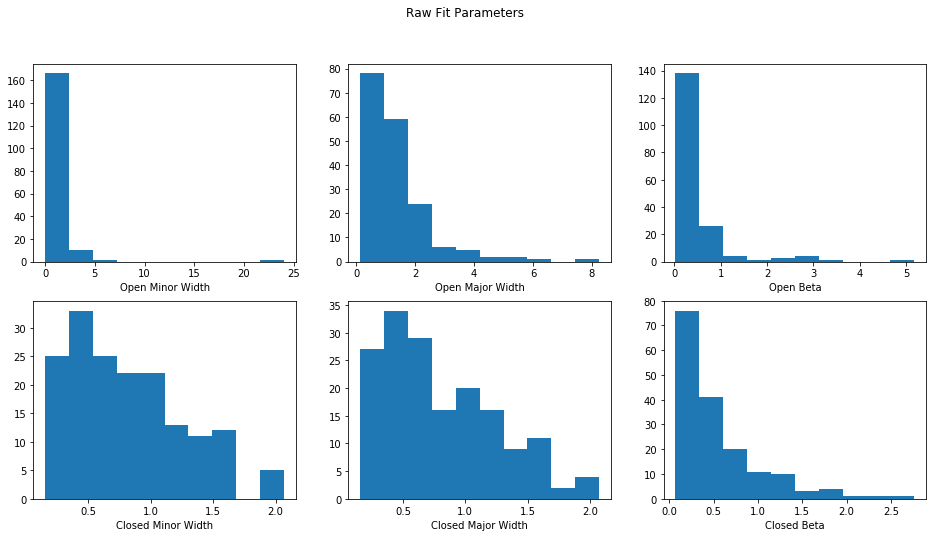

In [74]:
plt.figure(2, figsize=(16, 8)); plt.suptitle('Raw Fit Parameters')
plt.subplot(2,3,1); plt.hist(x_wid_o); plt.xlabel('Open Minor Width')
plt.subplot(2,3,2); plt.hist(y_wid_o); plt.xlabel('Open Major Width')
plt.subplot(2,3,3); plt.hist(power_o); plt.xlabel('Open Beta')
plt.subplot(2,3,4); plt.hist(x_wid_c); plt.xlabel('Closed Minor Width')
plt.subplot(2,3,5); plt.hist(y_wid_c); plt.xlabel('Closed Major Width')
plt.subplot(2,3,6); plt.hist(power_c); plt.xlabel('Closed Beta')